# Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "dataset/train.p"
#validation_file=?
testing_file = "dataset/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
X_train, X_valid, y_train, y_valid = train_test_split(train['features'], train['labels'], test_size=0.2, random_state=0)
X_test, y_test = test['features'], test['labels']

In [2]:
import csv
class_names = []
with open('signnames.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count != 0:
            class_names.append(row[1])
        line_count += 1

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Exploratory Data Analysis

#### Dataset summary

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

n_train = len(X_train)
n_valid = len(X_valid)
n_test = len(X_test)

# TODO: What's the shape of a traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(class_names)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 31367
Number of validation examples = 7842
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


<AxesSubplot:ylabel='class_names'>

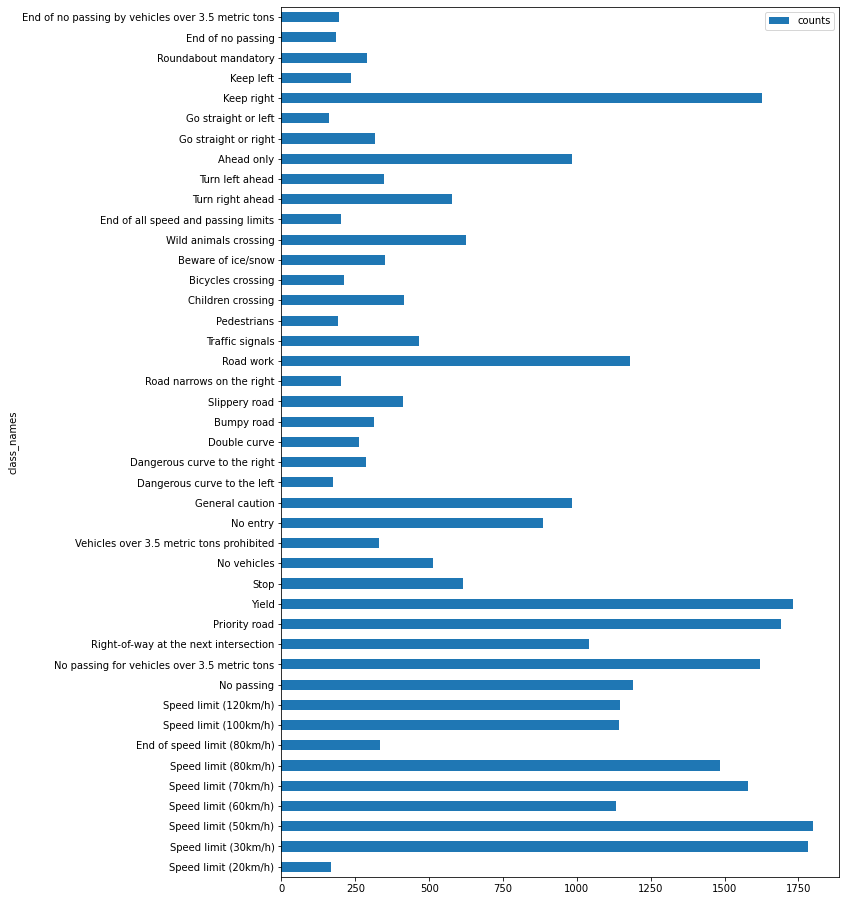

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import random
import numpy as np
import pandas as pd

hist, _ = np.histogram(y_train, bins=np.arange(n_classes+1))
df = pd.DataFrame(data={'class_names':class_names, 'counts':hist})
df.plot(y='counts', x='class_names', kind='barh', figsize=(10,16))

#### Display some images

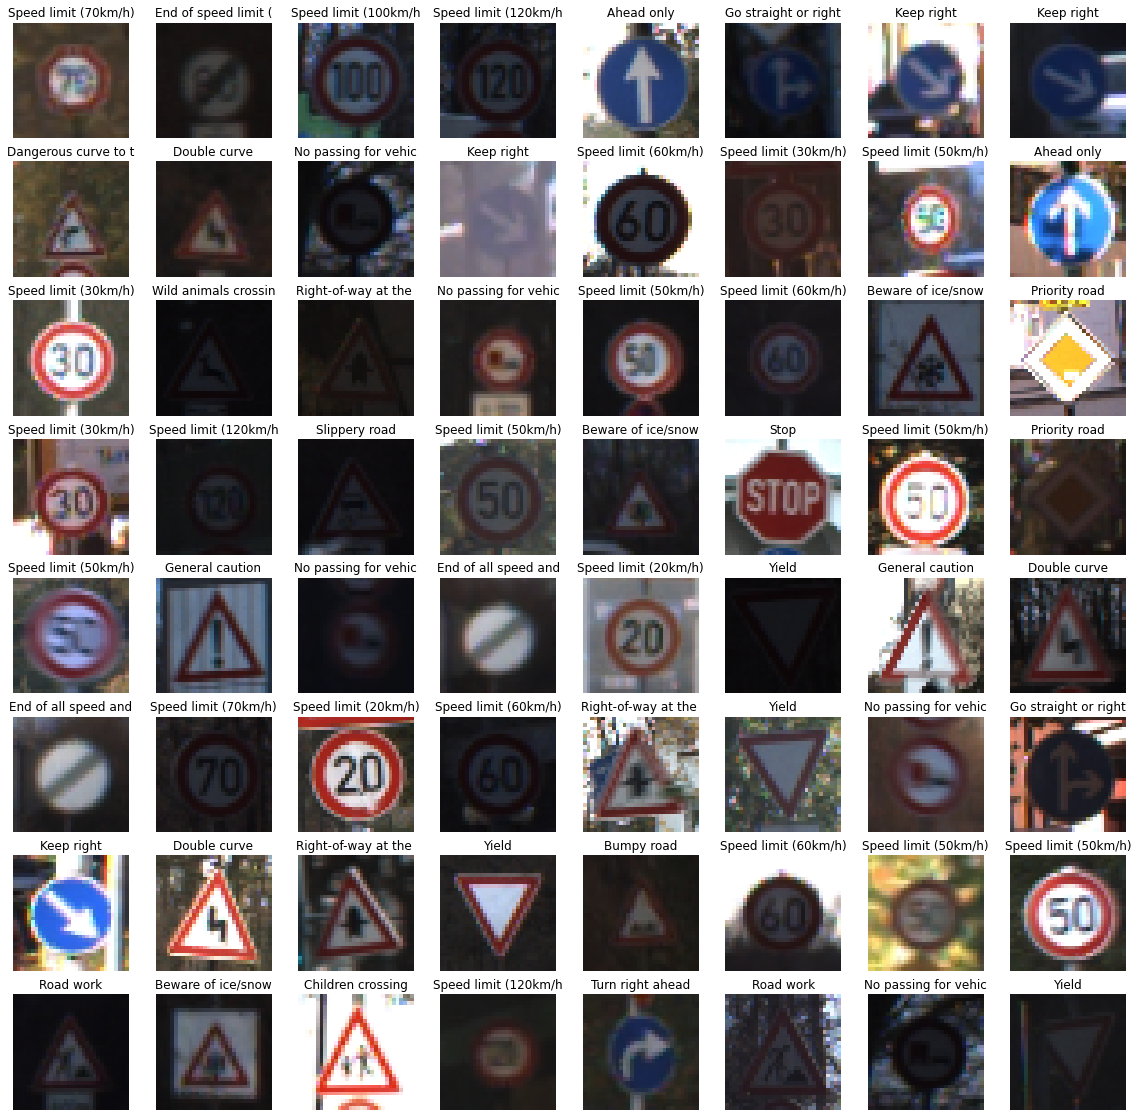

In [5]:

plt_size = 8
title_len_max = 20
fig, axs = plt.subplots(plt_size, plt_size)
fig.set_size_inches(20, 20)
for i in range(plt_size):
    for j in range(plt_size):
        rand_idx = random.randint(0,len(X_train))
        image = X_train[rand_idx]
        label = y_train[rand_idx]
        axs[i,j].imshow(image)
        title = class_names[label] if len(class_names[label])<title_len_max else class_names[label][:title_len_max]
        axs[i,j].set_title(title)
        axs[i,j].axis('off')

(32, 32, 3) uint8 255 27 Speed limit (70km/h) 4


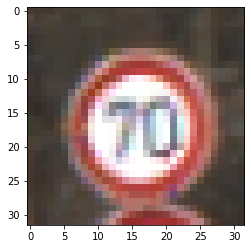

In [6]:
idx = 1
img = X_train[idx,:,:,:]
print(img.shape, img.dtype, np.max(img), np.min(img), class_names[y_train[idx]], y_train[idx])
plt.imshow(img)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2
def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    #gray_data = cv2.cvtColor(image_data, cv2.COLOR_RGB2GRAY )
    a = 0.1
    b = 0.9
    grayscale_min = 0
    grayscale_max = 255
    return a + ( ( (image_data - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )

X_train_processed = np.zeros((X_train.shape[:3] + (3,)), dtype=np.float32)
for i in range(len(X_train)):
    X_train_processed[i,:,:,:] = normalize_grayscale(X_train[i])
    
X_valid_processed = np.zeros((X_valid.shape[:3] + (3,)), dtype=np.float32)
for i in range(len(X_valid)):
    X_valid_processed[i,:,:,:]  = normalize_grayscale(X_valid[i])
    
X_test_processed = np.zeros((X_test.shape[:3] + (3,)), dtype=np.float32)
for i in range(len(X_test)):
    X_test_processed[i,:,:,:]  = normalize_grayscale(X_test[i])



(32, 32, 3) float32 0.8027451 0.15960784 No passing 9


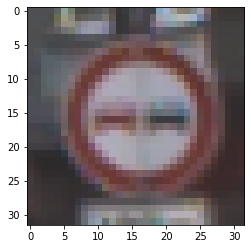

In [8]:
idx = random.randint(0,len(X_train_processed))
img = X_train_processed[idx,:,:,:]
print(img.shape, img.dtype, np.max(img), np.min(img), class_names[y_train[idx]], y_train[idx])
plt.imshow(img)
plt.show()

### Model Architecture

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(400))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv3)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # TODO: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # TODO: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [10]:
# Hyperparameters
EPOCHS = 20
BATCH_SIZE = 256
rate = 0.001

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
#tf.nn.softmax(logits)
top_k_operation = tf.nn.top_k(logits, k=5)
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.





In [11]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
losses, train_accs, valid_accs = [], [], []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_processed)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_, y_train_ = shuffle(X_train_processed, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_[offset:end], y_train_[offset:end]
            _, loss = sess.run([training_operation, loss_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            losses.append(loss)

        validation_accuracy = evaluate(X_valid_processed, y_valid)
        valid_accs.append(validation_accuracy)
        train_accuracy = evaluate(X_train_, y_train_)
        train_accs.append(train_accuracy)
        print(f"EPOCH {i+1:02}: Loss = {loss:.3f} Validation Accuracy = {validation_accuracy:.3f} Train Accuracy = {train_accuracy:.3f}")
        
    saver.save(sess, './lenet')
    print("Model saved")



Training...


EPOCH 01: Loss = 2.119 Validation Accuracy = 0.504 Train Accuracy = 0.508
EPOCH 02: Loss = 1.238 Validation Accuracy = 0.764 Train Accuracy = 0.772
EPOCH 03: Loss = 0.923 Validation Accuracy = 0.883 Train Accuracy = 0.888
EPOCH 04: Loss = 0.713 Validation Accuracy = 0.914 Train Accuracy = 0.922
EPOCH 05: Loss = 0.470 Validation Accuracy = 0.934 Train Accuracy = 0.945
EPOCH 06: Loss = 0.466 Validation Accuracy = 0.948 Train Accuracy = 0.958
EPOCH 07: Loss = 0.365 Validation Accuracy = 0.950 Train Accuracy = 0.958
EPOCH 08: Loss = 0.315 Validation Accuracy = 0.962 Train Accuracy = 0.973
EPOCH 09: Loss = 0.387 Validation Accuracy = 0.958 Train Accuracy = 0.969
EPOCH 10: Loss = 0.311 Validation Accuracy = 0.961 Train Accuracy = 0.973
EPOCH 11: Loss = 0.253 Validation Accuracy = 0.967 Train Accuracy = 0.977
EPOCH 12: Loss = 0.284 Validation Accuracy = 0.972 Train Accuracy = 0.982
EPOCH 13: Loss = 0.163 Validation Accuracy = 0.973 Train Accuracy = 0.982
EPOCH 14: Loss = 0.199

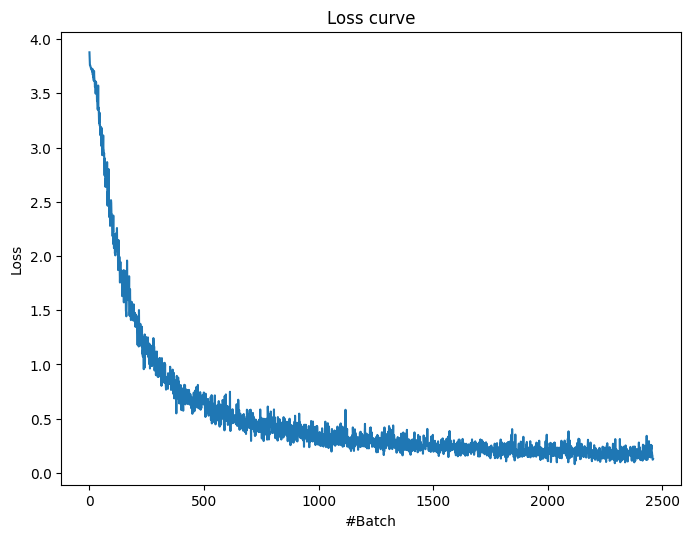

In [12]:
n_losses = len(losses)
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(np.arange(n_losses), losses)
plt.title('Loss curve')
plt.xlabel('#Batch')
plt.ylabel('Loss')
plt.show()

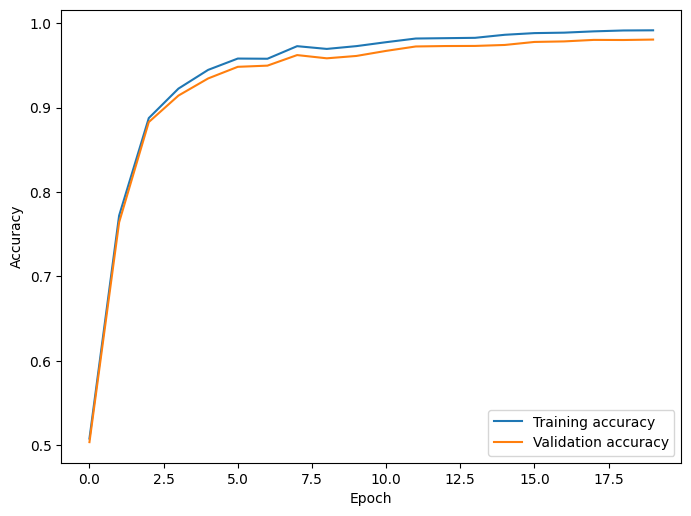

In [13]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(np.arange(EPOCHS), train_accs, label = "Training accuracy")
plt.plot(np.arange(EPOCHS), valid_accs, label = "Validation accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_processed, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.937


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

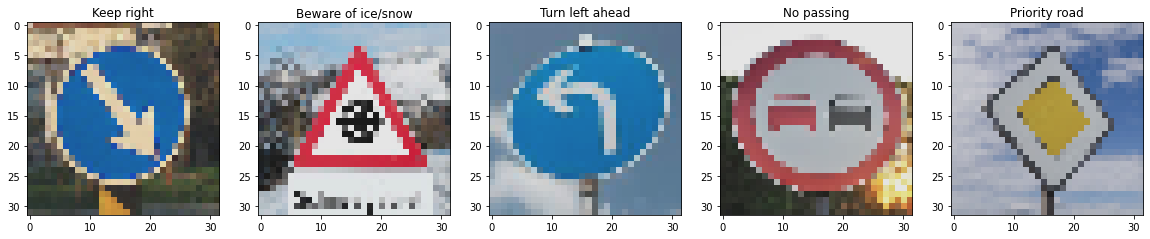

In [15]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

# Load some signs downloaded from https://en.wikipedia.org/wiki/Road_signs_in_Germany
import glob
img_files = glob.glob("assets/german_*.png")

fig, axs = plt.subplots(1, len(img_files))
fig.set_size_inches(20, 20)
images = np.zeros((len(img_files), 32, 32, 3), dtype=np.float32)
labels = np.array([38, 30, 34, 9, 12])
title_len_max = 20
for i in range(len(img_files)):
    img_bgr = cv2.imread(img_files[i])
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img_rgb, (32,32))
    images[i] =normalize_grayscale(img)
    label = labels[i]
    title = class_names[label] if len(class_names[label])<title_len_max else class_names[label][:title_len_max]
    axs[i].set_title(title)
    axs[i].imshow(images[i])
plt.show()

### Predict the Sign Type for Each Image

In [16]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

num_examples = len(images)
print(len(y_train))

prediction_operation = tf.argmax(logits, 1)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    accuracy = sess.run(accuracy_operation, feed_dict={x: images, y: labels, keep_prob: 1.0})
    predictions = sess.run(prediction_operation, feed_dict={x: images, keep_prob: 1.0})

31367
INFO:tensorflow:Restoring parameters from ./lenet


### Analyze Performance

In [17]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
print(f"Labels:     {labels}")
print(f"Prediction: {predictions}")
print(f"Accuracy: {accuracy:.03}")

Labels:     [38 30 34  9 12]
Prediction: [38 11 34  9 12]
Accuracy: 0.8


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

In [18]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
k = 5
top_k_operation = tf.nn.top_k(tf.nn.softmax(logits), k)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    top_k = sess.run(top_k_operation, feed_dict={x: images, keep_prob: 1.0})
    print(top_k.values)
    print(top_k.indices)

INFO:tensorflow:Restoring parameters from ./lenet
[[1.0000000e+00 3.5704826e-16 2.3198179e-21 3.0733850e-23 7.6278511e-24]
 [9.8772919e-01 6.6182972e-03 2.5000176e-03 1.8658759e-03 1.1690403e-03]
 [9.9953341e-01 4.4669144e-04 1.0079575e-05 5.6525710e-06 2.5036074e-06]
 [9.9501944e-01 2.2253788e-03 1.8769776e-03 3.8452726e-04 2.9645453e-04]
 [1.0000000e+00 1.2719394e-31 1.8678307e-32 3.4150421e-33 1.3747790e-33]]
[[38 34 36 13 32]
 [11 30 27 21 40]
 [34 33 35 38 36]
 [ 9 15 10 26 13]
 [12 11 42 10 14]]


In [19]:
for i in range(k):
    print(f"Image {i}")
    print(f"Correct label:          {class_names[labels[i]]}")
    print(f"Top prediction({top_k.values[i][0]:.5f}) {class_names[top_k.indices[i][0]]}")
    print(f"2nd prediction({top_k.values[i][1]:.5f}) {class_names[top_k.indices[i][1]]}")
    print(f"3rd prediction({top_k.values[i][2]:.5f}) {class_names[top_k.indices[i][2]]}")

Image 0
Correct label:          Keep right
Top prediction(1.00000) Keep right
2nd prediction(0.00000) Turn left ahead
3rd prediction(0.00000) Go straight or right
Image 1
Correct label:          Beware of ice/snow
Top prediction(0.98773) Right-of-way at the next intersection
2nd prediction(0.00662) Beware of ice/snow
3rd prediction(0.00250) Pedestrians
Image 2
Correct label:          Turn left ahead
Top prediction(0.99953) Turn left ahead
2nd prediction(0.00045) Turn right ahead
3rd prediction(0.00001) Ahead only
Image 3
Correct label:          No passing
Top prediction(0.99502) No passing
2nd prediction(0.00223) No vehicles
3rd prediction(0.00188) No passing for vehicles over 3.5 metric tons
Image 4
Correct label:          Priority road
Top prediction(1.00000) Priority road
2nd prediction(0.00000) Right-of-way at the next intersection
3rd prediction(0.00000) End of no passing by vehicles over 3.5 metric tons


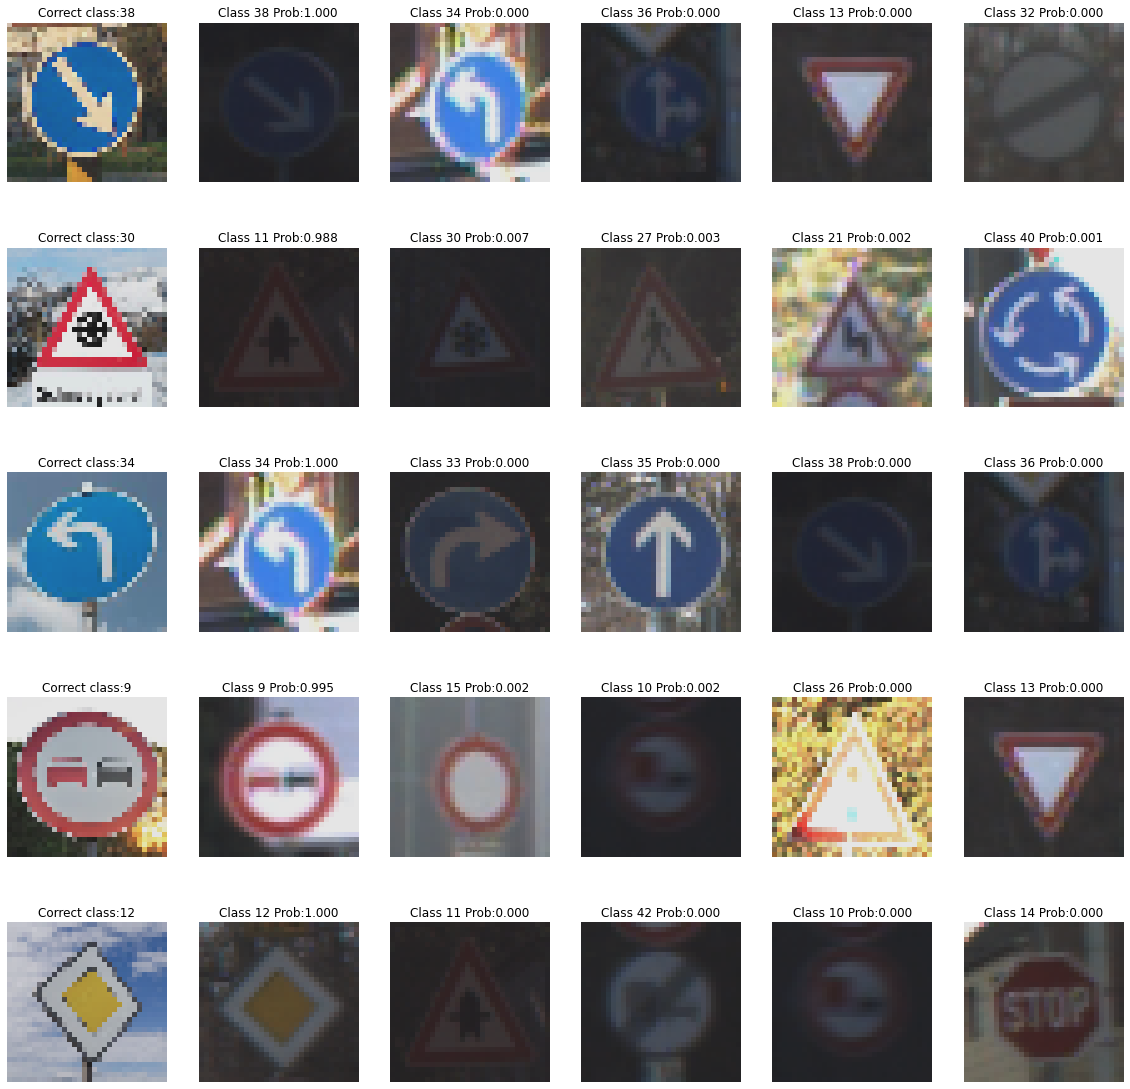

In [20]:
fig, axs = plt.subplots(num_examples, k+1)
fig.set_size_inches(20, 20)
for i in range(num_examples):
    for j in range(k+1):
        axs[i][j].axis('off')
        if j == 0:
            axs[i][j].set_title(f"Correct class:{labels[i]}")
            axs[i][j].imshow(images[i])
        else:
            idx = np.argwhere(y_train == top_k.indices[i][j-1])[0][0]
            example_img = X_train_processed[idx,:,:,:]
            axs[i][j].set_title(f"Class {top_k.indices[i][j-1]} Prob:{top_k.values[i][j-1]:.03f}")
            axs[i][j].imshow(example_img)
plt.show()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.